In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

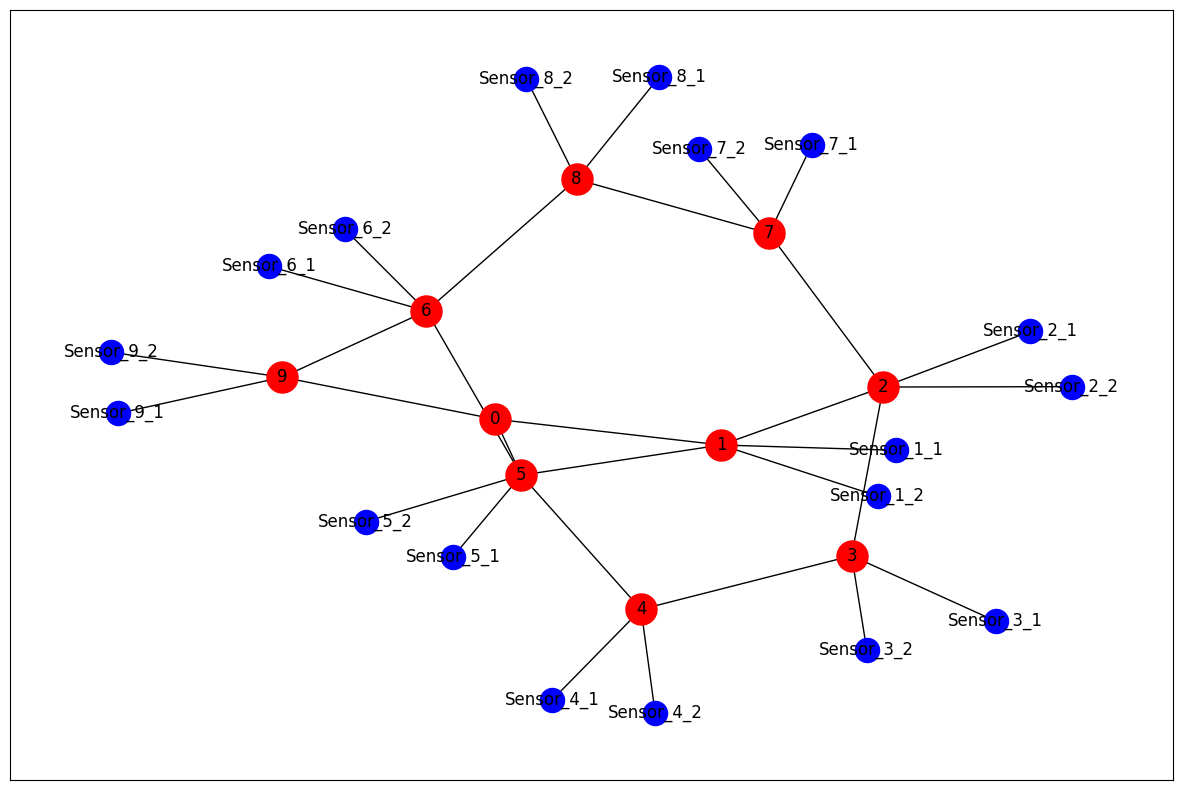

In [2]:
points_list = [(0, 1), (0, 5), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7), (6, 8), (6, 9), (3, 4), (9, 0), (7, 8)]
road_speed_limits = {0: 0, 1: 30, 2: 60, 3: 100, 4: 50, 5: 90, 6: 40, 7: 120, 8: 50, 9: 50}
sensors_on_roads = {1: [0.2, 0.5], 2: [0.5, 0.8], 3: [0.2, 0.7], 4: [0.3, 0.6], 5: [0.4, 0.9],
                    6: [0.5, 0.6], 7: [0.6, 0.8], 8: [0.7, 0.9], 9: [0.8, 0.10]}
goal = 7

G = nx.Graph()

for road, speed_limit in road_speed_limits.items():
    G.add_node(road, speed_limit=speed_limit)

for road, sensor_positions in sensors_on_roads.items():
    for i, position in enumerate(sensor_positions):
        G.add_node(f"Sensor_{road}_{i+1}", position=position)
        G.add_edge(road, f"Sensor_{road}_{i+1}")

G.add_edges_from(points_list)

pos = nx.spring_layout(G)
sensor_nodes = [node for node in G.nodes if "Sensor" in str(node)]
non_sensor_nodes = [node for node in G.nodes if "Sensor" not in str(node)]

plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(G, pos, nodelist=sensor_nodes, node_color='blue', node_size=300)
nx.draw_networkx_nodes(G, pos, nodelist=non_sensor_nodes, node_color='red', node_size=500)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.show()


In [3]:
road_speed_limits = {0: 0, 1: 30, 2: 60, 3: 100, 4: 50, 5: 90, 6: 40, 7: 120, 8: 50, 9: 50}
points_list = [(0, 1), (0, 5), (1, 5), (5, 6), (5, 4), (1, 2), (2, 3), (2, 7), (6, 8), (6, 9), (3, 4), (9, 0), (7, 8)]
Matrix_Size = 10
R = np.ones(shape=(Matrix_Size, Matrix_Size)) * -1

for point in points_list:
    speed1 = road_speed_limits[point[0]]
    speed2 = road_speed_limits[point[1]]
    print(f"{speed2} {point}")

    if point[1] == 7:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == 7:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[7, 7] = 100
print("\n", R)

30 (0, 1)
90 (0, 5)
90 (1, 5)
40 (5, 6)
50 (5, 4)
60 (1, 2)
100 (2, 3)
120 (2, 7)
50 (6, 8)
50 (6, 9)
50 (3, 4)
0 (9, 0)
50 (7, 8)

 [[ -1.   0.  -1.  -1.  -1.   0.  -1.  -1.  -1.   0.]
 [  0.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.   0.  -1.  -1.  -1. 100.  -1.  -1.]
 [ -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.   0.   0.]
 [ -1.  -1.   0.  -1.  -1.  -1.  -1. 100.   0.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0. 100.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.]]


In [4]:
Q = np.zeros([Matrix_Size, Matrix_Size])
gamma = 0.9

def available_actions(state):
    current_state_row = R[state]
    av_act = np.where(current_state_row >= 0)
    return av_act

def sample_next_action(available_actions_range):
    next_action_id = np.random.choice(len(available_actions_range))
    return available_actions_range[next_action_id]

def update(current_state, action, gamma):
    max_index = np.where(Q[action] == np.max(Q[action]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    speed = road_speed_limits[current_state]
    Q[current_state, action] = R[current_state, action] + gamma * (max_value + speed)

    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q) * 100))
    else:
        return(0)
    
current_state = 1
available_act = available_actions(current_state)
action = sample_next_action(available_act)

update_score = update(current_state, action, gamma)
print("Güncellenmiş Skor:", update_score)

Güncellenmiş Skor: 300.0


C:\Users\Hatice\AppData\Local\Temp\ipykernel_12040\374928870.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))


In [5]:
scores = []

for i in range(1000):
    current_state = np.random.randint(0, Q.shape[0])
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state, action, gamma)
    scores.append(score)
    
    print('Puan:', str(score))

print("Eğitim sonrası Q-tablosu:")
print(Q / np.max(Q) * 100)

Puan: 186.89655172413794
Puan: 361.8831168831169
Puan: 588.0519480519481
Puan: 630.5555555555557
Puan: 630.5555555555557
Puan: 684.9033816425122
Puan: 774.9033816425122
Puan: 612.058772387411
Puan: 708.9550519264637
Puan: 760.2807814480161
Puan: 784.1439128359586
Puan: 784.1439128359586
Puan: 864.1819382532606
Puan: 950.5737163612348
Puan: 605.2403598840358
Puan: 605.2403598840358
Puan: 540.3612467265258
Puan: 610.6001052616685
Puan: 692.9638692398275
Puan: 797.7415502599179
Puan: 818.9646882780204
Puan: 818.9646882780204
Puan: 818.9646882780204
Puan: 818.9646882780204
Puan: 873.8424431955824
Puan: 980.3522733101784
Puan: 980.3522733101784
Puan: 994.0207346776932
Puan: 888.8504782074647
Puan: 948.9994040593939
Puan: 948.9994040593939
Puan: 997.5718390509982
Puan: 997.5718390509982
Puan: 1041.287030543442
Puan: 1089.8594655350462
Puan: 1177.2898485199335
Puan: 1255.9491701204984
Puan: 1256.5335767537663
Puan: 1270.4195749298378
Puan: 1281.225845844857
Puan: 1281.225845844857
Puan: 1281.

C:\Users\Hatice\AppData\Local\Temp\ipykernel_12040\374928870.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size=1))
C:\Users\Hatice\AppData\Local\Temp\ipykernel_12040\374928870.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)


In [6]:
current_state = 0
steps = [(current_state, 0)]

while current_state != goal:
    next_step_index = np.argmax(Q[current_state])
    speed = road_speed_limits[next_step_index]
    steps.append((next_step_index, speed))
    current_state = next_step_index

print("En iyi yol ve hızlar:")
print(steps)


En iyi yol ve hızlar:
[(0, 0), (1, 30), (2, 60), (7, 120)]


In [7]:
print(Q)

[[   0.         1665.33954189    0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [  27.            0.         1850.3815877     0.            0.
    27.            0.            0.            0.            0.        ]
 [   0.           54.            0.           54.            0.
     0.            0.         2025.9815877     0.            0.        ]
 [   0.            0.         1913.3815877     0.           90.
     0.            0.            0.            0.            0.        ]
 [   0.            0.            0.         1767.04342893    0.
    45.            0.            0.            0.            0.        ]
 [  81.           81.            0.            0.           81.
     0.         1747.14954189    0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
    36.            0.            0.         1851.28342893   36.        ]
 [   0.            0.         1931.383428